In [1]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
df = pandas.read_csv('s3://isat252-liu/csv')     #Reading in the file
df[:5]    #Running it

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
1,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
2,07/06/2020,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
3,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
4,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia


In [18]:
df.sum()['cases']

7069278

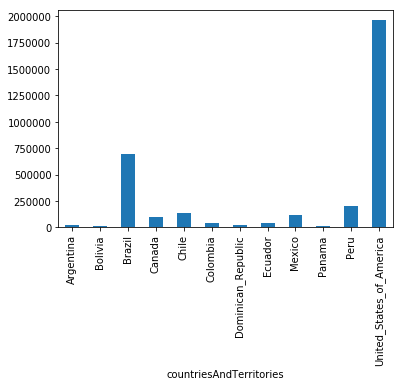

In [2]:
cases_in_america = df.loc[df['continentExp'] == 'America' ]
total_cases_in_america = cases_in_america.groupby('countriesAndTerritories').sum()['cases']
worst_cases_in_america = total_cases_in_america.loc[total_cases_in_america >= 10000]
worst_cases_in_america[:]
worst_cases_in_america.plot.bar()

In [13]:
deaths_in_america = df.loc[df['continentExp'] == 'America' ]
sum_deaths_in_america = deaths_in_america.groupby('countriesAndTerritories').sum()['deaths']
most_deaths_in_america = sum_deaths_in_america.loc[sum_deaths_in_america >= 1000]
top_deaths_in_america = sum_deaths_in_america.nlargest(7)

In [11]:
top_twenty_death_percentages

countriesAndTerritories
Yemen                           0.225806
Sint_Maarten                    0.194805
France                          0.189438
Belgium                         0.161909
Italy                           0.144357
United_Kingdom                  0.141257
Hungary                         0.136522
Netherlands                     0.126019
British_Virgin_Islands          0.125000
Mexico                          0.117009
Antigua_and_Barbuda             0.115385
Spain                           0.112264
Bahamas                         0.106796
Belize                          0.105263
Sweden                          0.104004
Jersey                          0.096154
Montserrat                      0.090909
United_States_Virgin_Islands    0.084507
Ecuador                         0.083960
Chad                            0.083433
dtype: float64

In [9]:
death_percentages = df.groupby('countriesAndTerritories').sum()['deaths']/df.groupby('countriesAndTerritories').sum()['cases']
top_twenty_death_percentages = death_percentages.nlargest(20)     #Countries with the worst death rate
worst_death_rate = pandas.concat([death_percentages,top_twenty_death_percentages],axis=1)
worst_death_rate[:]
top_twenty_death_rate = worst_death_rate.loc[worst_death_rate[1] > 0]
top_twenty_death_rate[:]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,0,1
Antigua_and_Barbuda,0.115385,0.115385
Bahamas,0.106796,0.106796
Belgium,0.161909,0.161909
Belize,0.105263,0.105263
British_Virgin_Islands,0.125000,0.125000
Chad,0.083433,0.083433
Ecuador,0.083960,0.083960
France,0.189438,0.189438
Hungary,0.136522,0.136522
Italy,0.144357,0.144357


In [14]:
# plt.bar
# plt.plot(deaths_vs_cases_in_america['cases'])
# plt.plot(deaths_vs_cases_in_america['deaths'])

In [10]:
# death_percentages[:]
# worst_cases_in_america[:]

worst_cases_death_rate = pandas.concat([death_percentages,worst_cases_in_america],axis=1)

# worst_cases_death_rate[:]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



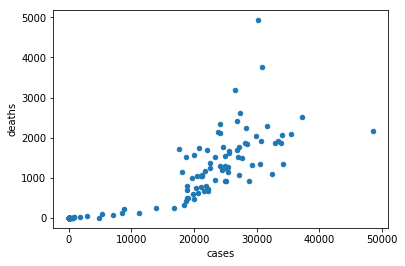

In [6]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data.plot.scatter(x='cases',y='deaths')

In [4]:
cases_in_oceania = df.loc[df['continentExp'] == 'Oceania' ]
cases_in_oceania.groupby('countriesAndTerritories').sum()['cases']

countriesAndTerritories
Australia                   7265
Fiji                          18
French_Polynesia              60
Guam                         180
New_Caledonia                 20
New_Zealand                 1154
Northern_Mariana_Islands      28
Papua_New_Guinea               8
Name: cases, dtype: int64

In [5]:
# cases_in_afghanistan = df.loc[df['countriesAndTerritories'] == 'Afghanistan' ]
# cases_in_afghanistan.describe()

In [15]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [17]:
df.groupby('countriesAndTerritories').mean()['popData2018']

countriesAndTerritories
Afghanistan                           37172386.0
Albania                                2866376.0
Algeria                               42228429.0
Andorra                                  77006.0
Angola                                30809762.0
Anguilla                                     NaN
Antigua_and_Barbuda                      96286.0
Argentina                             44494502.0
Armenia                                2951776.0
Aruba                                   105845.0
Australia                             24992369.0
Austria                                8847037.0
Azerbaijan                             9942334.0
Bahamas                                 385640.0
Bahrain                                1569439.0
Bangladesh                           161356039.0
Barbados                                286641.0
Belarus                                9485386.0
Belgium                               11422068.0
Belize                                  38307